In [1]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objects as go

In [2]:
#upload the dataset

df = pd.read_csv('./raw_data/adult.csv')
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

# Data analysis

In [3]:
df.shape

(32561, 15)

In [4]:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [5]:
df.duplicated().sum()

24

In [6]:
df = df.drop_duplicates()
df.shape

(32537, 15)

In [7]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [10]:
df['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df[(df['occupation']=='?') & (df['workclass']=='?')].shape[0]

1836

^ this means that every row with 'workclass' = ? also has 'occupation' = ? but the contrary is not true. There are 7 occupation == ? but with workclass != ?

let's encode the ? with NaN values

In [13]:
df[df == '?'] = np.nan
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                    NaN  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                    NaN      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32537 rows x 15 columns]

In [14]:
missing_values_table(df)

Your selected dataframe has 15 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
occupation                1843                5.7
workclass                 1836                5.6
native.country             582                1.8

In [15]:
df['occupation'].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [16]:
df['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [17]:
df['native.country'].mode()

0    United-States
Name: native.country, dtype: object

Let's impute NaN values with mode

In [18]:
columns = ['occupation', 'workclass', 'native.country']

for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [19]:
missing_values_table(df)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

# Data visualization

In [13]:
df['income'].value_counts()[0]

24698

In [14]:
df_income = pd.DataFrame(df['income'].value_counts())

fig = go.Figure(data=[go.Bar(x=df_income.index, y=df_income['income'])])
fig.show()

In [15]:
df['income'].value_counts(normalize=True)

<=50K    0.759074
>50K     0.240926
Name: income, dtype: float64

More than 75% of our target is classified as earning <=50

In [16]:
df_race = pd.DataFrame(df['race'].value_counts())

fig = go.Figure(data=[go.Bar(x=df_race.index, y=df_race['race'])])
fig.show()

In [17]:
df['race'].value_counts(normalize=True)

White                 0.854258
Black                 0.095952
Asian-Pac-Islander    0.031902
Amer-Indian-Eskimo    0.009558
Other                 0.008329
Name: race, dtype: float64

More than 85% of the people who responded to the census are White

In [18]:
df_education = pd.DataFrame(df['education'].value_counts())

fig = go.Figure(data=[go.Bar(x=df_education.index, y=df_education['education'])])
fig.show()

In [19]:
df['education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

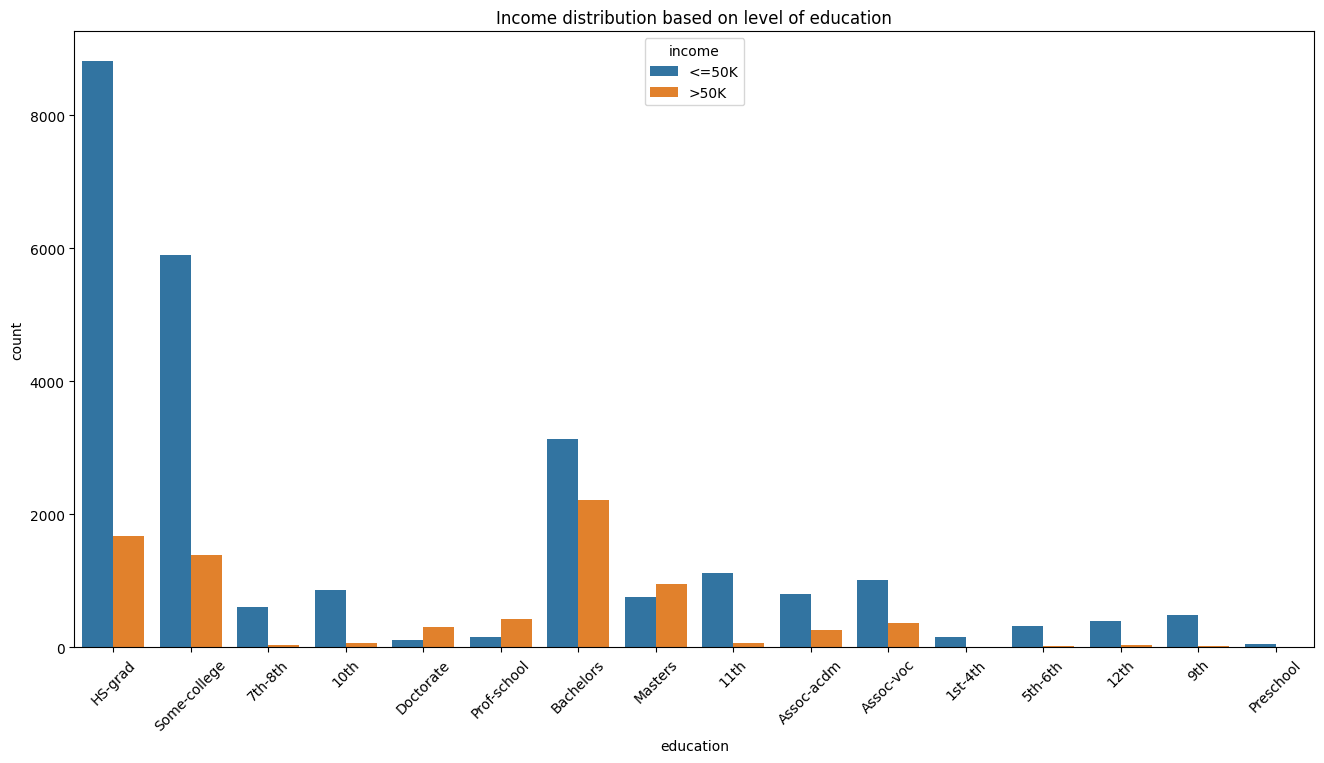

In [20]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='education', hue='income')
plt.title('Income distribution based on level of education')
plt.xticks(rotation=45)
plt.show()

The ones that have a level of education = 'Masters', 'Doctorate', and 'Prof-school' are more likely to earn > 50k, while all the other levels of education are more likely to earn <=50k. 

The level of education with more people earning >50k is 'Bachelors', followed by 'HS-grad'

In [21]:
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32537 rows x 15 columns]

In [22]:
df['age'].nunique()

73

In [23]:
bins = range(10, 101, 10)
df['age_bins'] = pd.cut(df['age'], bins)

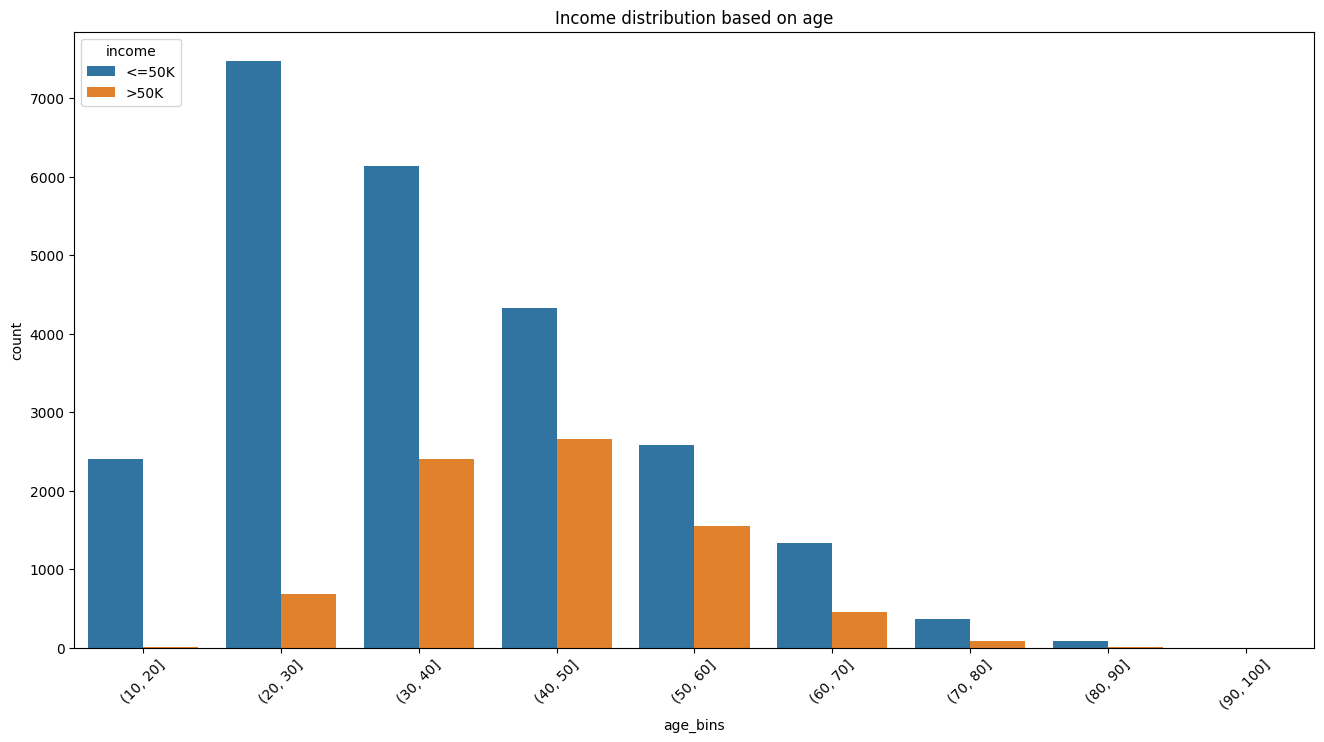

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='age_bins', hue='income')
plt.title('Income distribution based on age')
plt.xticks(rotation=45)
plt.show()

The age range with more people earning >50k is 40-50, followed by 30-40 and 50-60

In [25]:
df['occupation'].nunique()

15

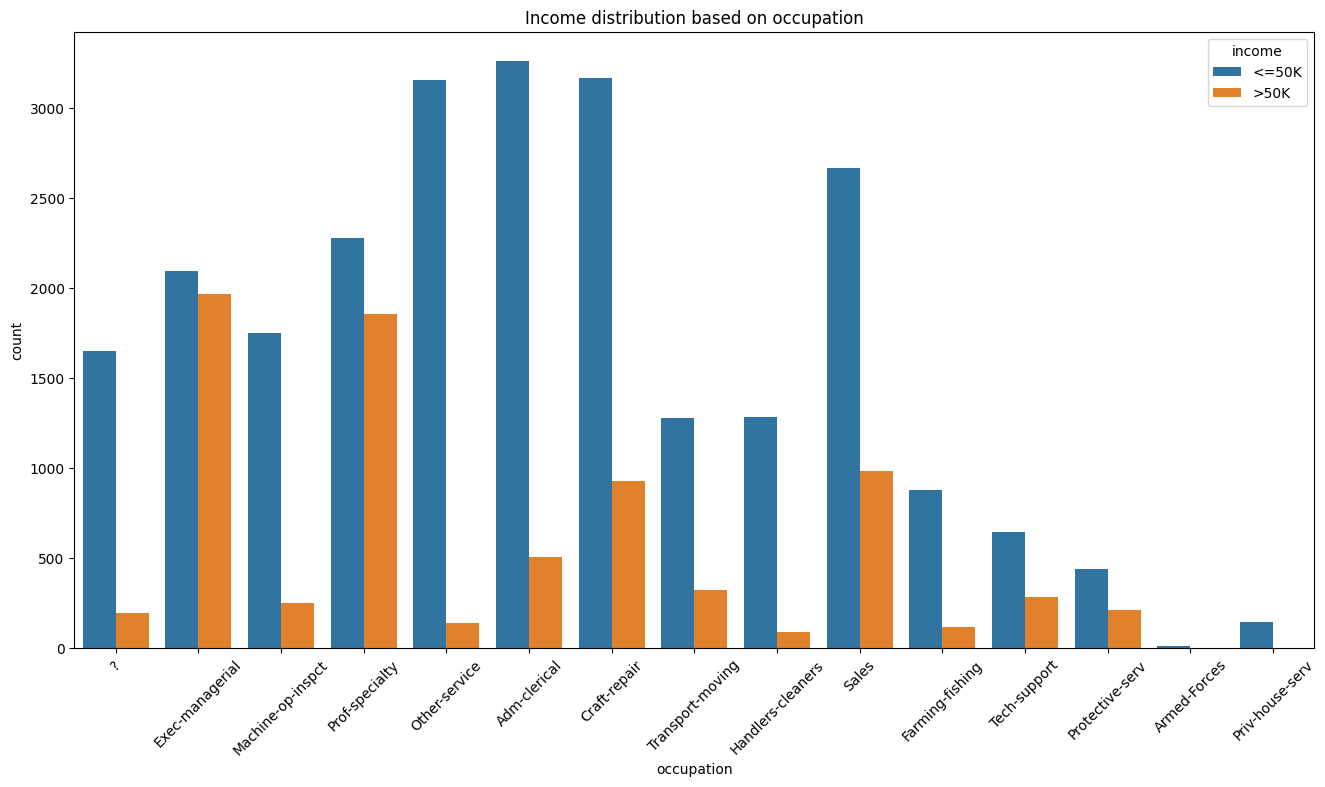

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='occupation', hue='income')
plt.title('Income distribution based on occupation')
plt.xticks(rotation=45)
plt.show()

The occupations with more people earning >50k are 'Exec-managerial' and 'Prof-specialty'. These are high above the others. 'Sales' and 'Craft-repair' have also a significant amount of >50k earners 

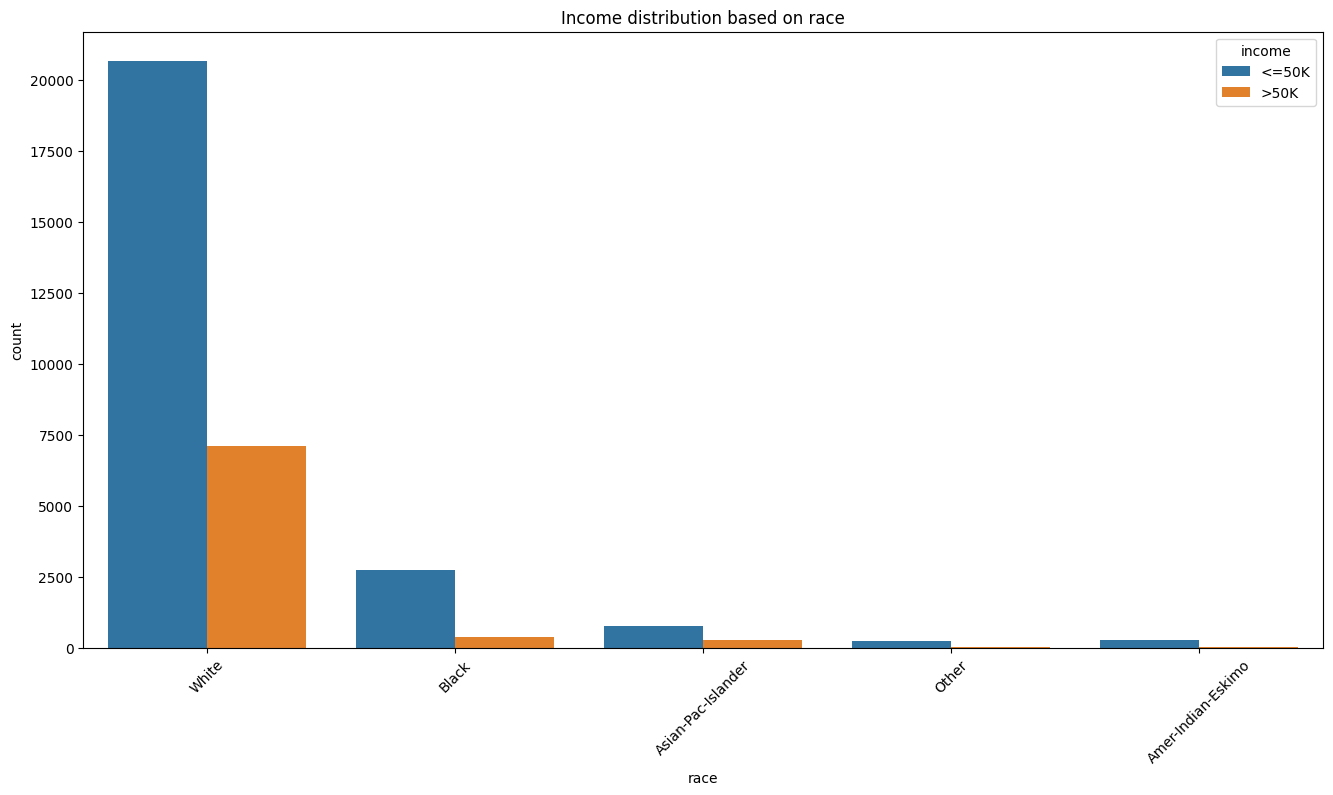

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='race', hue='income')
plt.title('Income distribution based on race')
plt.xticks(rotation=45)
plt.show()

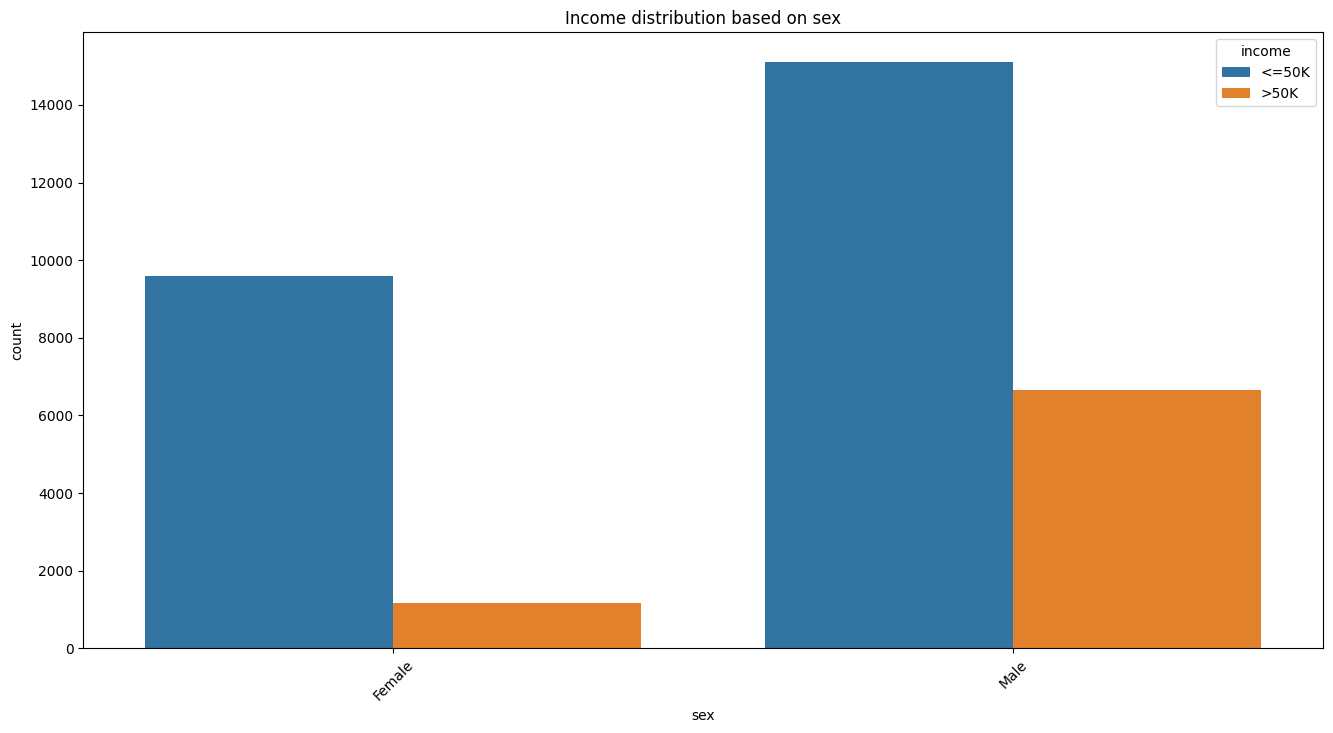

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Income distribution based on sex')
plt.xticks(rotation=45)
plt.show()

In [29]:
df[(df['sex']=='Male') & (df['income']=='>50K')].shape[0]/df[(df['sex']=='Male')].shape[0]

0.3058553386911596

In [30]:
df[(df['sex']=='Female') & (df['income']=='>50K')].shape[0]/df[(df['sex']=='Female')].shape[0]

0.1095521278572756

31% of men inquired have an income >50k while 10% of women earn >50k

In [31]:
df['hours.per.week'].nunique()

94

In [32]:
bins = range(0, 101, 10)
df['hours.per.week_bins'] = pd.cut(df['hours.per.week'], bins)

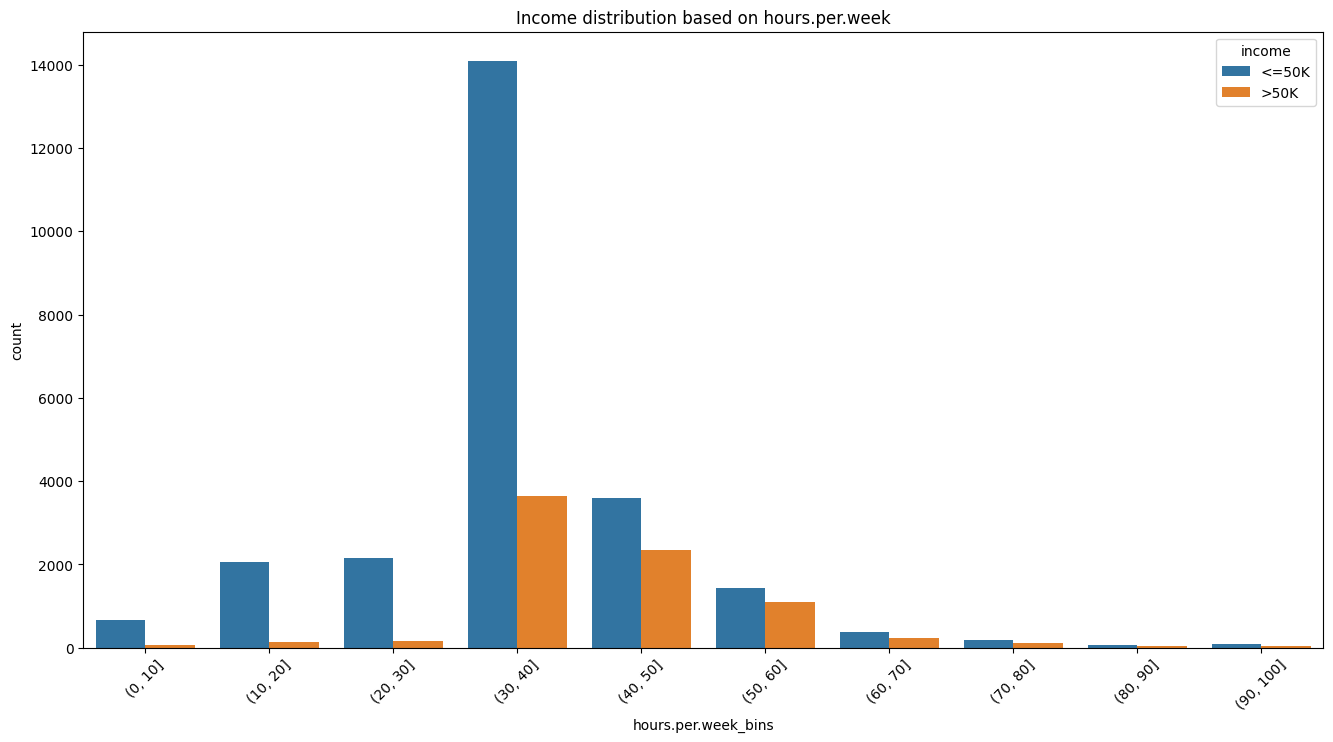

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='hours.per.week_bins', hue='income')
plt.title('Income distribution based on hours.per.week')
plt.xticks(rotation=45)
plt.show()

Most people who earn >50k work between 30 and 50 hours a week

In [34]:
df['marital.status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

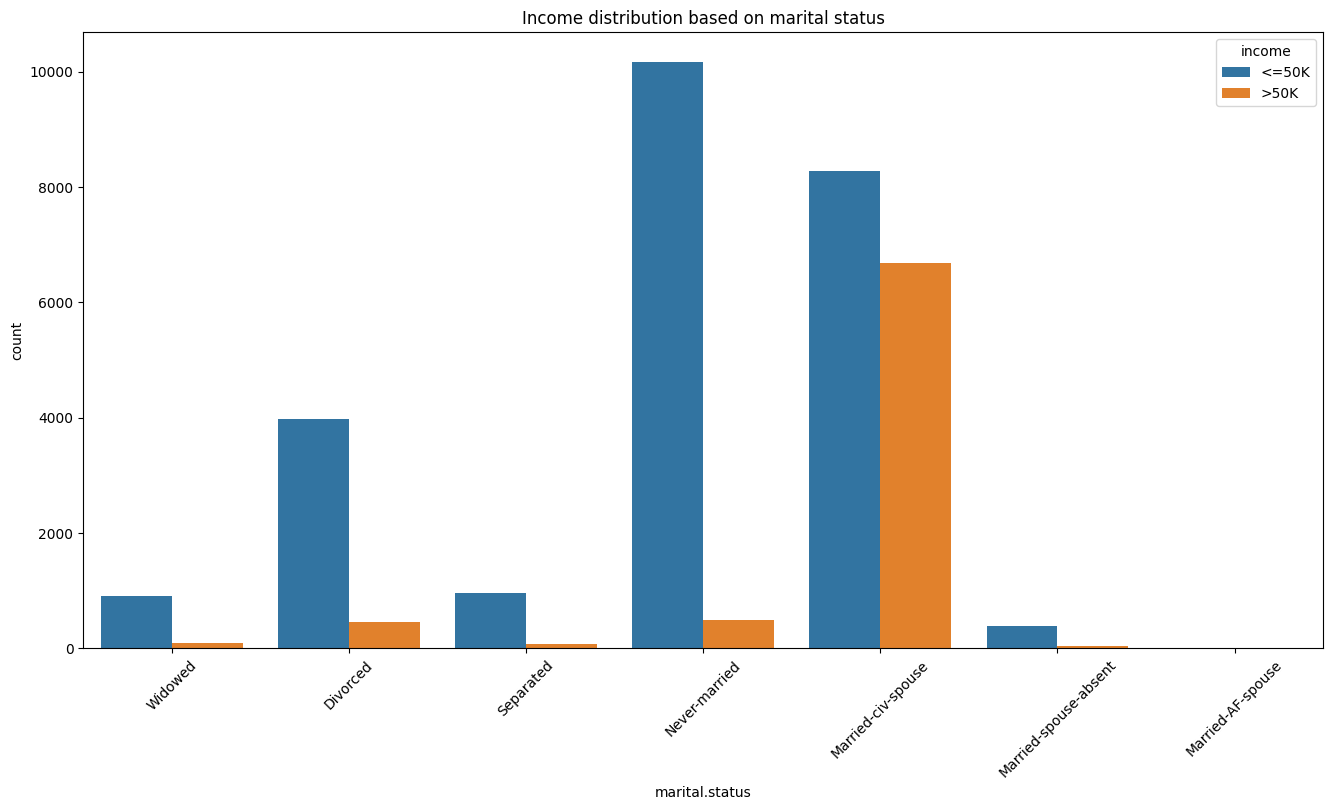

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='marital.status', hue='income')
plt.title('Income distribution based on marital status')
plt.xticks(rotation=45)
plt.show()

The marital status with more people earning >50k is, by far, married-civ-spouse followed by 'Divorced' and 'Never-married'

In [36]:
df['relationship'].value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

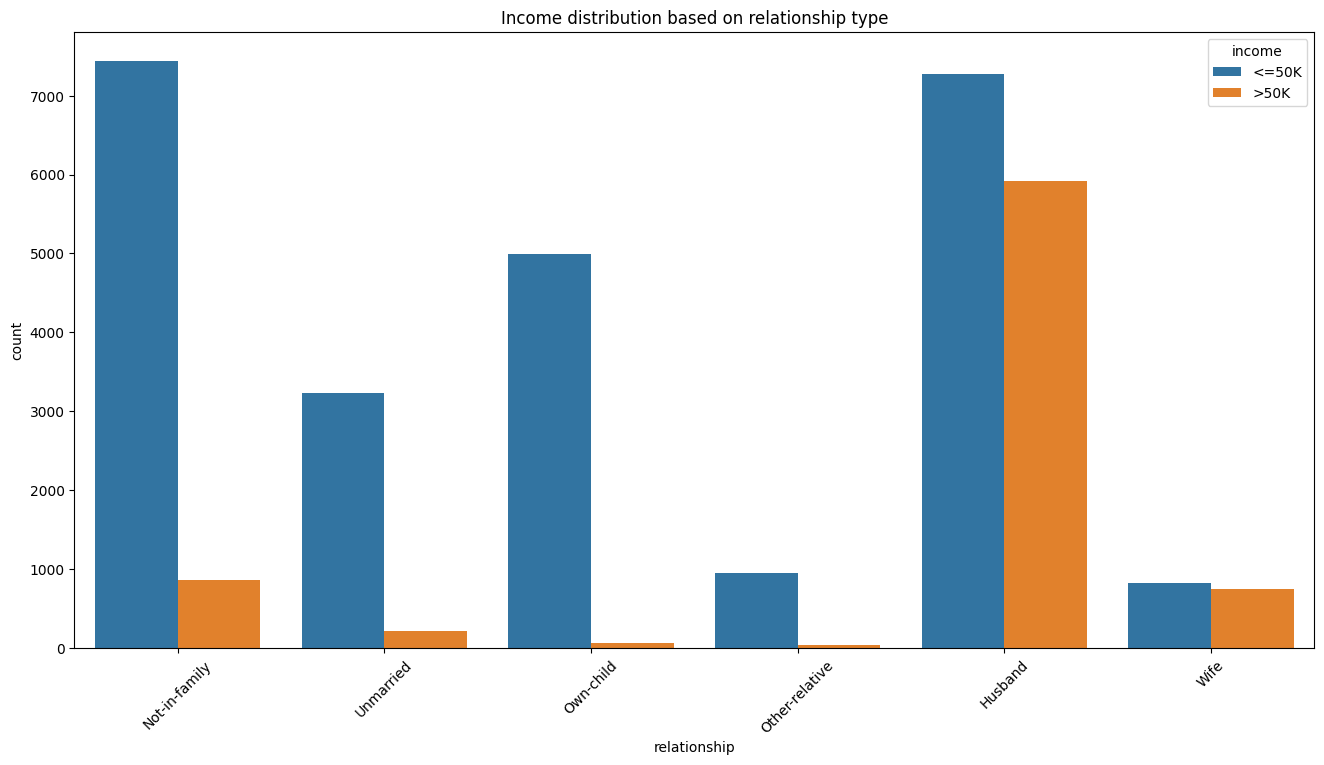

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='relationship', hue='income')
plt.title('Income distribution based on relationship type')
plt.xticks(rotation=45)
plt.show()

The relationship type with more people earning >50k is 'Husband', by far. The relationship type 'Wife' has a ratio of almost 50-50 of woman earning more and less than 50k 

In [64]:
df['native.country'].value_counts()

United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [65]:
non_us_df = df[df['native.country']!='United-States']
non_us_df

age         workclass  fnlwgt    education  education.num  \
26      33           Private  228696      1st-4th              2   
27      49           Private  122066      5th-6th              3   
47      73  Self-emp-not-inc  233882      HS-grad              9   
63      51  Self-emp-not-inc  160724    Bachelors             13   
67      55      Self-emp-inc  124137  Prof-school             15   
...    ...               ...     ...          ...            ...   
32468   85           Private   98611    Bachelors             13   
32513   45           Private  155093         10th              6   
32536   54           Private  337992    Bachelors             13   
32549   43           Private  260761      HS-grad              9   
32554   32           Private  116138      Masters             14   

           marital.status         occupation   relationship  \
26     Married-civ-spouse       Craft-repair  Not-in-family   
27     Married-civ-spouse      Other-service        Husband   
47     Married-civ-spouse    Farming-fishing        Husband   
63     Married-civ-spouse              Sales        Husband   
67     Married-civ-spouse     Prof-specialty        Husband   
...                   ...                ...            ...   
32468  Married-civ-spouse    Exec-managerial        Husband   
32513            Divorced      Other-service  Not-in-family   
32536  Married-civ-spouse    Exec-managerial        Husband   
32549  Married-civ-spouse  Machine-op-inspct        Husband   
32554       Never-married       Tech-support  Not-in-family   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
26                  White    Male             0          2603              32   
27                  White    Male             0          2603              40   
47     Asian-Pac-Islander    Male             0          2457              40   
63     Asian-Pac-Islander    Male             0          2415              40   
67                  White    Male             0          2415              35   
...                   ...     ...           ...           ...             ...   
32468               White    Male             0             0               3   
32513               Black  Female             0             0              38   
32536  Asian-Pac-Islander    Male             0             0              50   
32549               White    Male             0             0              40   
32554  Asian-Pac-Islander    Male             0             0              11   

           native.country income  age_bins hours.per.week_bins  
26                 Mexico  <=50K  (30, 40]            (30, 40]  
27                 Greece  <=50K  (40, 50]            (30, 40]  
47                Vietnam  <=50K  (70, 80]            (30, 40]  
63                  China   >50K  (50, 60]            (30, 40]  
67                 Greece   >50K  (50, 60]            (30, 40]  
...                   ...    ...       ...                 ...  
32468              Poland  <=50K  (80, 90]             (0, 10]  
32513  Dominican-Republic  <=50K  (40, 50]            (30, 40]  
32536               Japan   >50K  (50, 60]            (40, 50]  
32549              Mexico  <=50K  (40, 50]            (30, 40]  
32554              Taiwan  <=50K  (30, 40]            (10, 20]  

[2802 rows x 17 columns]

In [66]:
non_us_df['native.country'].nunique()

40

In [67]:
top_10 = non_us_df['native.country'].value_counts().head(10).index
non_us_df[non_us_df['native.country'].isin(top_10)]

age    workclass  fnlwgt    education  education.num  \
26      33      Private  228696      1st-4th              2   
90      39      Private  198654  Prof-school             15   
95      46      Private  192963    Bachelors             13   
157     28      Private  251905  Prof-school             15   
167     40      Private  287983    Bachelors             13   
...    ...          ...     ...          ...            ...   
32397   39      Private  214896      HS-grad              9   
32439   23      Private  180771      1st-4th              2   
32442   39  Federal-gov  110622    Bachelors             13   
32446   36      Private  208068    Preschool              1   
32549   43      Private  260761      HS-grad              9   

           marital.status         occupation   relationship  \
26     Married-civ-spouse       Craft-repair  Not-in-family   
90     Married-civ-spouse     Prof-specialty        Husband   
95     Married-civ-spouse       Adm-clerical        Husband   
157         Never-married     Prof-specialty  Not-in-family   
167         Never-married       Tech-support  Not-in-family   
...                   ...                ...            ...   
32397           Separated      Other-service  Not-in-family   
32439  Married-civ-spouse  Machine-op-inspct           Wife   
32442  Married-civ-spouse       Adm-clerical           Wife   
32446            Divorced      Other-service  Not-in-family   
32549  Married-civ-spouse  Machine-op-inspct        Husband   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
26                  White    Male             0          2603              32   
90     Asian-Pac-Islander    Male             0          2415              67   
95     Asian-Pac-Islander    Male             0          2415              35   
157                 White    Male             0          2339              40   
167    Asian-Pac-Islander  Female             0          2258              48   
...                   ...     ...           ...           ...             ...   
32397               White  Female             0             0              40   
32439  Amer-Indian-Eskimo  Female             0             0              35   
32442  Asian-Pac-Islander  Female             0             0              40   
32446               Other    Male             0             0              72   
32549               White    Male             0             0              40   

      native.country income  age_bins hours.per.week_bins  
26            Mexico  <=50K  (30, 40]            (30, 40]  
90             India   >50K  (30, 40]            (60, 70]  
95       Philippines   >50K  (40, 50]            (30, 40]  
157           Canada  <=50K  (20, 30]            (30, 40]  
167      Philippines  <=50K  (30, 40]            (40, 50]  
...              ...    ...       ...                 ...  
32397    El-Salvador  <=50K  (30, 40]            (30, 40]  
32439         Mexico  <=50K  (20, 30]            (30, 40]  
32442    Philippines  <=50K  (30, 40]            (30, 40]  
32446         Mexico  <=50K  (30, 40]            (70, 80]  
32549         Mexico  <=50K  (40, 50]            (30, 40]  

[1681 rows x 17 columns]

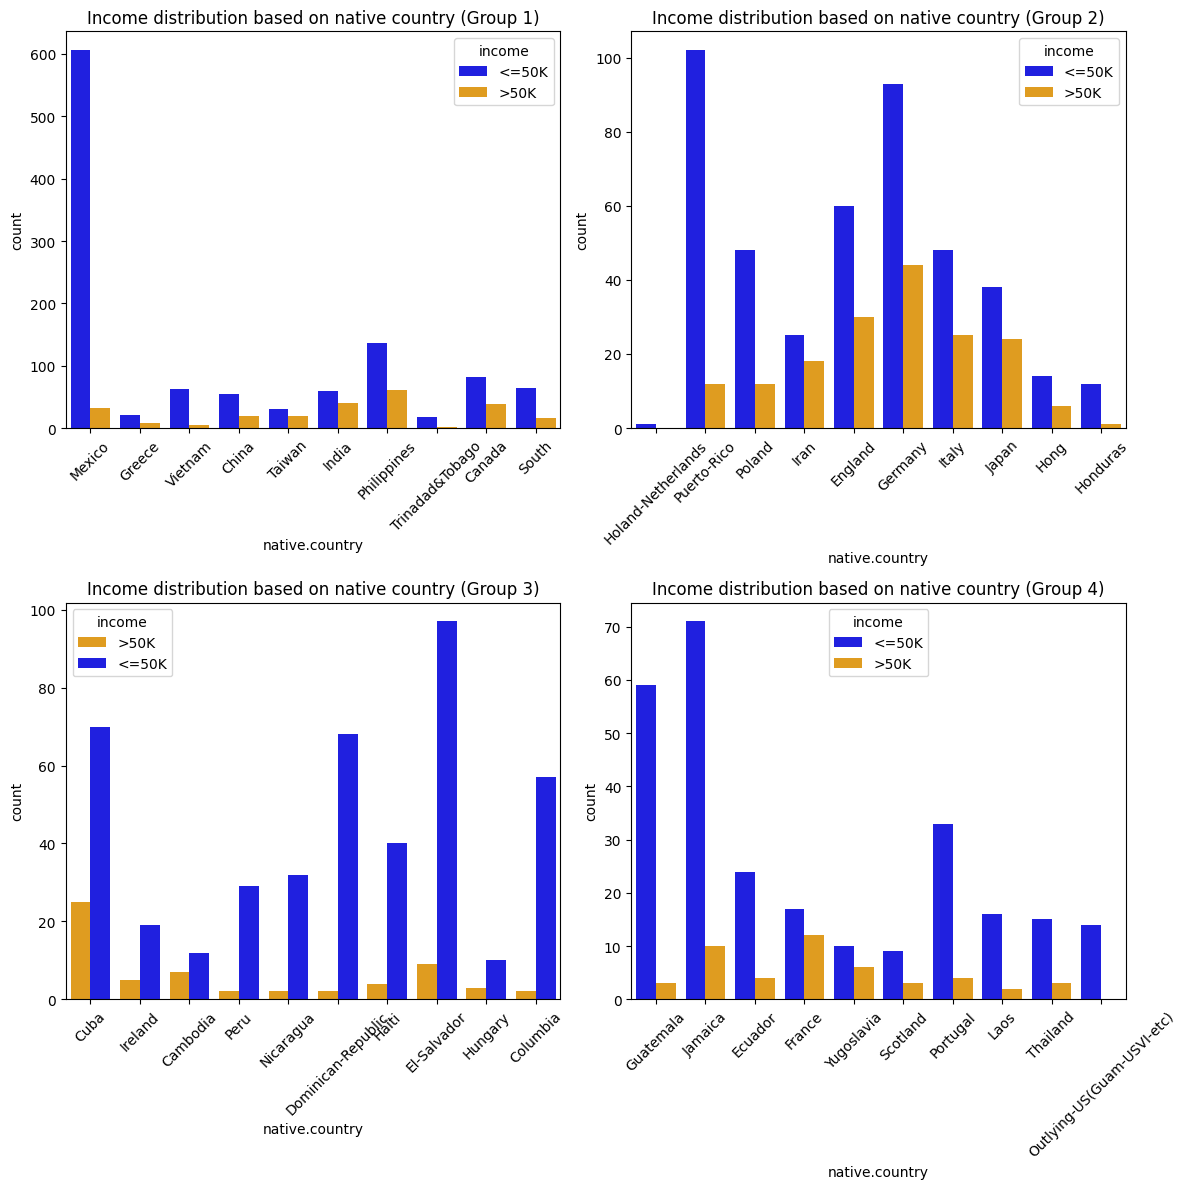

In [68]:
colors = {'>50K': 'orange', '<=50K': 'blue'}

# Get the unique native countries
countries = non_us_df['native.country'].unique()

# Split the countries into groups of ten
country_groups = [countries[i:i+10] for i in range(0, len(countries), 10)]

# Determine the number of subplots needed
num_plots = len(country_groups)
num_cols = 2
num_rows = (num_plots + 1) // 2  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
axes = axes.flatten()

# Plot countplots for each group of ten countries
for i, group in enumerate(country_groups):
    filtered_df = non_us_df[non_us_df['native.country'].isin(group)]
    ax = axes[i]
    sns.countplot(data=filtered_df, x='native.country', hue='income', ax=ax, palette=colors)
    ax.set_title(f"Income distribution based on native country (Group {i+1})")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Hide empty subplots if necessary
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Feature Engineering

## Define target and features

In [34]:
X = df.drop(columns=['income'], axis=1)

y = df['income']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Encode categorical features

In [36]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder

cat_col = X.select_dtypes(include=['object']).columns

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

for col in cat_col:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [38]:
X_train

age  workclass  fnlwgt  education  education.num  marital.status  \
1216    62          3  109463         15             10               5   
27958   52          3  312477         11              9               6   
23074   69          3  168794          5              4               2   
19677   33          3  199227          9             13               2   
19179   40          3  374367          8             11               5   
...    ...        ...     ...        ...            ...             ...   
29823   31          3  112627         11              9               2   
5390    51          3  146767          8             11               2   
860     55          0  238192         11              9               2   
15800   23          3  233626          9             13               4   
23667   47          5  171968          9             13               6   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
1216           11             4     4    0             0          1617   
27958          13             1     4    1             0             0   
23074           9             0     4    1             0             0   
19677           3             0     4    1             0             0   
19179          11             1     2    1             0             0   
...           ...           ...   ...  ...           ...           ...   
29823          13             0     0    1             0             0   
5390            9             0     4    1             0             0   
860            12             0     4    1             0          1887   
15800          11             1     4    1             0             0   
23667           3             4     1    0             0             0   

       hours.per.week  native.country  
1216               33              38  
27958              40              38  
23074              48              38  
19677              55              38  
19179              44              38  
...               ...             ...  
29823              40              38  
5390               40              38  
860                40              38  
15800              25              38  
23667              60              36  

[22775 rows x 14 columns]

## Feature Scaling

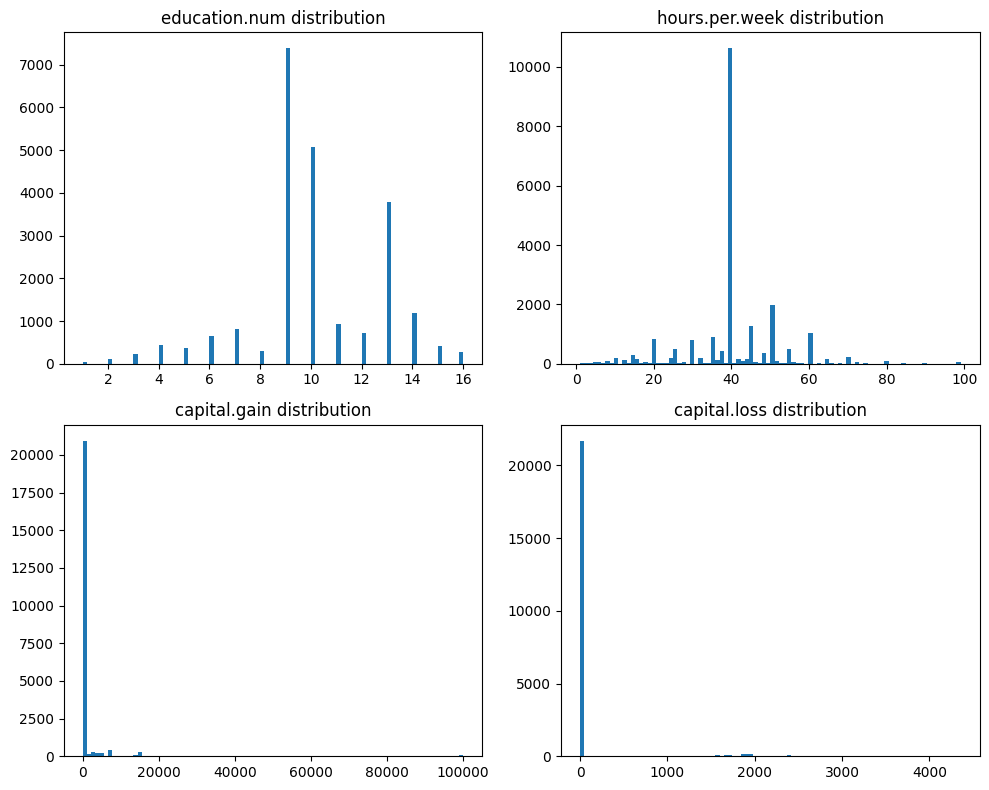

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(X_train['education.num'], bins = 90)
axes[0, 0].set_title('education.num distribution')

axes[0, 1].hist(X_train['hours.per.week'], bins = 90)
axes[0, 1].set_title('hours.per.week distribution')

axes[1, 0].hist(X_train['capital.gain'], bins = 90)
axes[1, 0].set_title('capital.gain distribution')

axes[1, 1].hist(X_train['capital.loss'], bins = 90)
axes[1, 1].set_title('capital.loss distribution')

plt.tight_layout()
plt.show()

Data is not normally distributed. We'll apply StandardScaler to the features

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [41]:
X_train

age  workclass    fnlwgt  education  education.num  \
0      1.719100  -0.085012 -0.754592   1.215517      -0.034646   
1      0.984731  -0.085012  1.167816   0.180266      -0.424687   
2      2.233158  -0.085012 -0.192767  -1.372611      -2.374893   
3     -0.410569  -0.085012  0.095414  -0.337360       1.135478   
4      0.103489  -0.085012  1.753873  -0.596173       0.355396   
...         ...        ...       ...        ...            ...   
22770 -0.557443  -0.085012 -0.724631   0.180266      -0.424687   
22771  0.911294  -0.085012 -0.401348  -0.596173       0.355396   
22772  1.205042  -2.785369  0.464386   0.180266      -0.424687   
22773 -1.144938  -0.085012  0.421149  -0.337360       1.135478   
22774  0.617547   1.715226 -0.162711  -0.337360       1.135478   

       marital.status  occupation  relationship      race       sex  \
0            1.588320    1.226546      1.579154  0.396785 -1.421322   
1            2.253149    1.729134     -0.280828  0.396785  0.703570   
2           -0.406166    0.723958     -0.900822  0.396785  0.703570   
3           -0.406166   -0.783805     -0.900822  0.396785  0.703570   
4            1.588320    1.226546     -0.280828 -1.938600  0.703570   
...               ...         ...           ...       ...       ...   
22770       -0.406166    1.729134     -0.900822 -4.273985  0.703570   
22771       -0.406166    0.723958     -0.900822  0.396785  0.703570   
22772       -0.406166    1.477840     -0.900822  0.396785  0.703570   
22773        0.923492    1.226546     -0.280828  0.396785  0.703570   
22774        2.253149   -0.783805      1.579154 -3.106293 -1.421322   

       capital.gain  capital.loss  hours.per.week  native.country  
0         -0.146525      3.781030       -0.603438        0.259289  
1         -0.146525     -0.217300       -0.037637        0.259289  
2         -0.146525     -0.217300        0.608992        0.259289  
3         -0.146525     -0.217300        1.174793        0.259289  
4         -0.146525     -0.217300        0.285677        0.259289  
...             ...           ...             ...             ...  
22770     -0.146525     -0.217300       -0.037637        0.259289  
22771     -0.146525     -0.217300       -0.037637        0.259289  
22772     -0.146525      4.448655       -0.037637        0.259289  
22773     -0.146525     -0.217300       -1.250067        0.259289  
22774     -0.146525     -0.217300        1.578936       -0.073958  

[22775 rows x 14 columns]

## Cross validation with Logistic Regression model

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

cv1 = cross_val_score(log_model, X_train, y_train, cv=5)
cv1.mean()

0.8241492864983535

## Logistic Regression model with PCA

__taken from: https://www.kaggle.com/code/prashant111/eda-logistic-regression-pca__

__Explained Variance Ratio__


A very useful piece of information is the explained variance ratio of each principal component. It is available via the explained_variance_ratio_ variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [43]:
from sklearn.decomposition import PCA

pca = PCA()

X_train = pca.fit_transform(X_train)

pca.explained_variance_ratio_

array([0.1476186 , 0.10142834, 0.08042233, 0.07958796, 0.07456397,
       0.0733667 , 0.07070457, 0.06752334, 0.06474505, 0.06094819,
       0.05979889, 0.04926225, 0.04280906, 0.02722075])

The pca.explained_variance_ratio_ results shows that approximately 97.3% of the variance is explained by the first 13 features. The last one only represents 2.7% of the variance. Let's drop it

(0.0, 13.65)

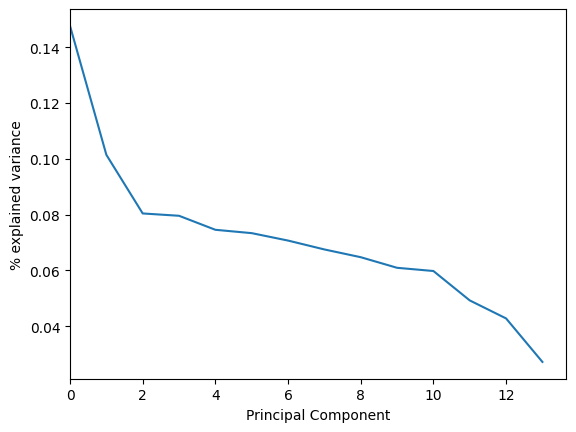

In [59]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');
plt.xlim(0)

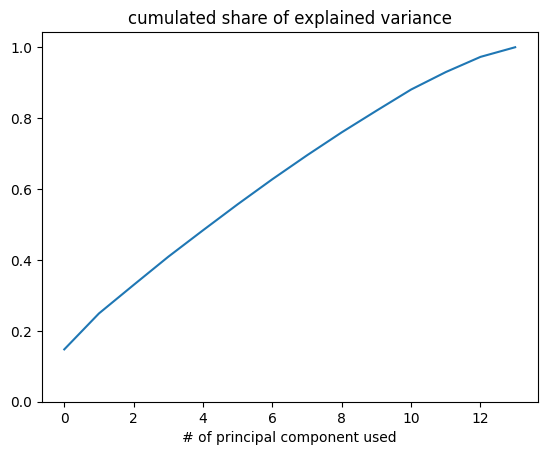

In [60]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

### 13 features

In [45]:
def preprocess_features(X):
    "This function encodes categorical features using LabelEncoder and scales the data with StandardScaler"
    
    #label encoder
    encoder = LabelEncoder()
    cat_feat = X.select_dtypes(include=['object']).columns
    for feat in cat_feat:
        X[feat] = encoder.fit_transform(X[feat])
        
    #data scaling
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X

In [49]:
#drop last feature
X = df.drop(columns=['income', 'native.country'], axis=1)

#encode and scale features
X = preprocess_features(X)

In [50]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model2 = LogisticRegression()

cv2 = cross_val_score(log_model2, X_train, y_train, cv=5)
cv2.mean()

0.8240175631174533

### 12 features

In [51]:
X = df.drop(columns=['income', 'native.country', 'hours.per.week'], axis=1)

X = preprocess_features(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model3 = LogisticRegression()

cv3 = cross_val_score(log_model3, X_train, y_train, cv=5)
cv3.mean()

0.8230515916575192

### 11 features

In [52]:
X = df.drop(columns=['income', 'native.country', 'hours.per.week', 'capital.loss'], axis=1)

X = preprocess_features(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model4 = LogisticRegression()

cv4 = cross_val_score(log_model4, X_train, y_train, cv=5)
cv4.mean()

0.8200658616904501

# Logistic Regression with accuracy_score

In [53]:
from sklearn.metrics import accuracy_score

## all 14 features

In [54]:
X = df.drop(columns=['income'], axis=1)

X = preprocess_features(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8252


## 11 features

In [55]:
X = df.drop(columns=['income', 'native.country', 'hours.per.week', 'capital.loss'], axis=1)

X = preprocess_features(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8234


# CV with KNNClassifier model

## 14 features

In [62]:
#drop last feature
X = df.drop(columns=['income'], axis=1)

#encode and scale features
X = preprocess_features(X)

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

cv5 = cross_val_score(knn_model, X_train, y_train, cv=5)
cv5.mean()

0.8248079034028539

In [64]:
cv1.mean()

0.8241492864983535

## KNN Classifier with n_neighbors = 12

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=12)

knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8341
